In [1]:
import numpy as np
import pandas as pd
import random

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('prices.txt')
df=df.sample(frac=1)
dfpriceX=df.drop("25.9", axis=1)
dfpriceY=df["25.9"]
dffireX=df.drop("0", axis=1)
dffireY=df["0"]


np_dfpriceX=dfpriceX.to_numpy()
np_dfpriceY=dfpriceY.to_numpy()
np_dffireX=dffireX.to_numpy()
np_dffireY=dffireY.to_numpy()

In [3]:
train_np_dfpriceX=np_dfpriceX[0:int(0.75*len(np_dfpriceX))]
test_np_dfpriceX=np_dfpriceX[int(0.75*len(np_dfpriceX)):len(np_dfpriceX)]


train_np_dfpriceY=np_dfpriceY[0:int(0.75*len(np_dfpriceY))]
test_np_dfpriceY=np_dfpriceY[int(0.75*len(np_dfpriceY)):len(np_dfpriceY)]


train_np_dffireX=np_dffireX[0:int(0.85*len(np_dffireX))]
test_np_dffireX=np_dffireX[int(0.85*len(np_dffireX)):len(np_dffireX)]


train_np_dffireY=np_dffireY[0:int(0.85*len(np_dffireY))]
test_np_dffireY=np_dffireY[int(0.85*len(np_dffireY)):len(np_dffireY)]


In [4]:
def linear_regression_fit(datax, datay):
    w = np.zeros(datax.shape[1])
    b = 0
    alpha = 0.001
    for iteration in range(100000):
        deriv_b = np.mean(1*((np.dot(datax,w)+b)-datay))
        gradient_w = 1.0/len(datay) * np.dot(((np.dot(datax,w)+b)-datay), datax)
        b -= alpha*deriv_b
        w -= alpha*gradient_w
    return (b,w)

def linear_regression_predict(b,w,datax,datay):
    pred=[]
    mse=0
    for i in range (len(datax)):
        p=b+np.sum(w.dot(datax[i]))
        pred.append(p)
        mse+=(p-datay[i])**2
    mse=mse/len(datax)
    print("MSE: ", mse)
    plt.plot(test_np_dfpriceY)
    plt.plot(pred)
    plt.show()
    

MSE:  20.209724810963326


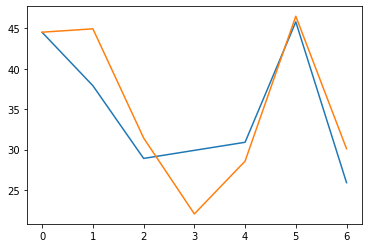

In [5]:
b, w=linear_regression_fit(train_np_dfpriceX, train_np_dfpriceY)
linear_regression_predict(b, w, test_np_dfpriceX, test_np_dfpriceY)

In [6]:
def h(x,w,b):
    return 1 / (1+np.exp(-(np.dot(x,w) + b)))

def logistic_regression_fit(datax, datay):
    w = np.zeros(datax.shape[1])
    b = 0
    alpha = 0.001
    for iteration in range(100000):
        gradient_b = np.mean(1*(datay-(h([datax],w,b))))
        gradient_w = np.dot((datay-h(datax,w,b)), datax)*1/len(datay)
        b += alpha*gradient_b
        w += alpha*gradient_w
    return b,w

def logistic_regression_predict(b,w,datax,datay):
    pred=[]
    tp=0 #if correct is 0 and classified 0
    fp=0 #if correct is 1 and classified 0
    tn=0 #if correct is 1 and classified 1
    fn=0 #if correct is 0 and classified 1
    for i in range(len(datax)):
        p=h(np.array([datax[i]]),w,b)
        if p>=0.5:
            pred.append(1)
        else:
            pred.append(0)
        if (pred[-i]==0 and datay[i]==0):
            tp+=1
        if (pred[-i]==0 and datay[i]==1):
            fp+=1
        if (pred[-i]==1 and datay[i]==1):
            tn+=1
        if (pred[-i]==1 and datay[i]==0):
            fn+=1
    ps=tp/(tp + fp)
    rs=tp/(tp + fn)
    f1=2*ps*rs/(ps+rs)
    print("confussion matrix: [ tp    fp")
    print("                    ",tp,"  ", fp)
    print("                     fn    tn")
    print("                    ",fn,"  ",tn,"]") 
    print("presicion score: ",ps)
    print("recall score: ",rs)
    print("f1 score: ",f1)    

In [7]:
b, w=logistic_regression_fit(train_np_dffireX,train_np_dffireY)
logistic_regression_predict(b,w,test_np_dffireX,test_np_dffireY)

confussion matrix: [ tp    fp
                     4    1
                     fn    tn
                     0    0 ]
presicion score:  0.8
recall score:  1.0
f1 score:  0.888888888888889
